In [12]:
from google.colab import files
uploaded = files.upload()


Saving nba_traditional_stats_2020_2025_all.csv to nba_traditional_stats_2020_2025_all (2).csv


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [14]:
df = pd.read_csv('nba_traditional_stats_2020_2025_all.csv')
df['Season_Type'] = df['Season_Type'].str.replace('%20', ' ')
df = df[df['Year'] == '2024-25'].copy()


In [15]:
cols = ['Player', 'PTS', 'FGA', 'FTA']
df[cols[1:]] = df[cols[1:]].apply(pd.to_numeric, errors='coerce')
df = df.dropna(subset=cols[1:])

# Custom scoring efficiency
df['Scoring_Efficiency'] = df['PTS'] / (df['FGA'] + 0.5 * df['FTA'])

# Remove unrealistic outliers (low sample size)
df_filtered = df[(df['FGA'] > 100) & (df['PTS'] > 300)]


In [16]:
top10_eff = df_filtered.sort_values(by='Scoring_Efficiency', ascending=False).head(10)
top10_eff[['PLAYER', 'PTS', 'FGA', 'FTA', 'Scoring_Efficiency']]


,PLAYER,PTS,FGA,FTA,Scoring_Efficiency
3214,Jarrett Allen,1103,640,277,1.416827
3417,Jaxson Hayes,383,223,98,1.408088
3296,Daniel Gafford,701,403,196,1.399202
3437,Adem Bona,337,192,100,1.392562
3449,Dereck Lively II,314,191,73,1.380220
3238,Jalen Duren,918,546,242,1.376312
3396,Luke Kornet,441,280,97,1.342466
3249,Rudy Gobert,866,510,273,1.339520
3452,Neemias Queta,310,203,61,1.327623
3398,Jay Huff,439,305,56,1.318318


/tmp/ipython-input-17-3310635608.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Scoring_Efficiency', y='PLAYER', data=top10_eff, palette='mako')


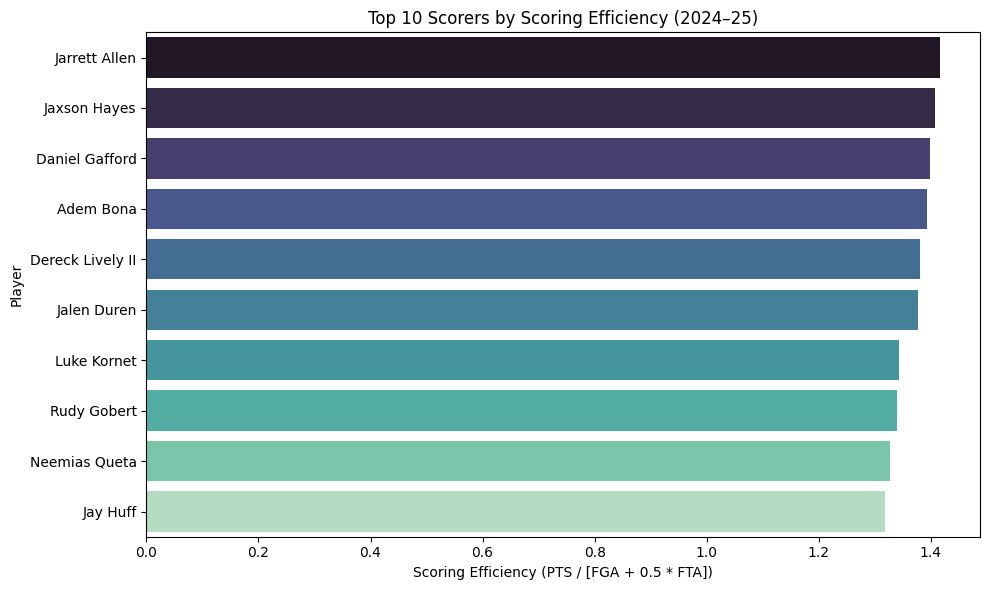

In [17]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Scoring_Efficiency', y='PLAYER', data=top10_eff, palette='mako')
plt.title('Top 10 Scorers by Scoring Efficiency (2024–25)')
plt.xlabel('Scoring Efficiency (PTS / [FGA + 0.5 * FTA])')
plt.ylabel('Player')
plt.tight_layout()
plt.show()


In [18]:
top10_eff.to_csv('top10_scoring_efficiency_2024_2025.csv', index=False)
